In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [5]:
data = r"amz_uk_price_prediction_dataset.csv"
amz_data = pd.read_csv(data)

In [132]:
amz_data.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [69]:
amz_data.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [16]:
amz_data.groupby(["category"])["asin"].count().sort_values(ascending=False).head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: asin, dtype: int64

In [23]:
amz_cats = pd.crosstab(amz_data["category"], columns="frequency").sort_values(by="frequency", ascending=False)
amz_cats.head(5)

col_0,frequency
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


<Axes: xlabel='category', ylabel='frequency'>

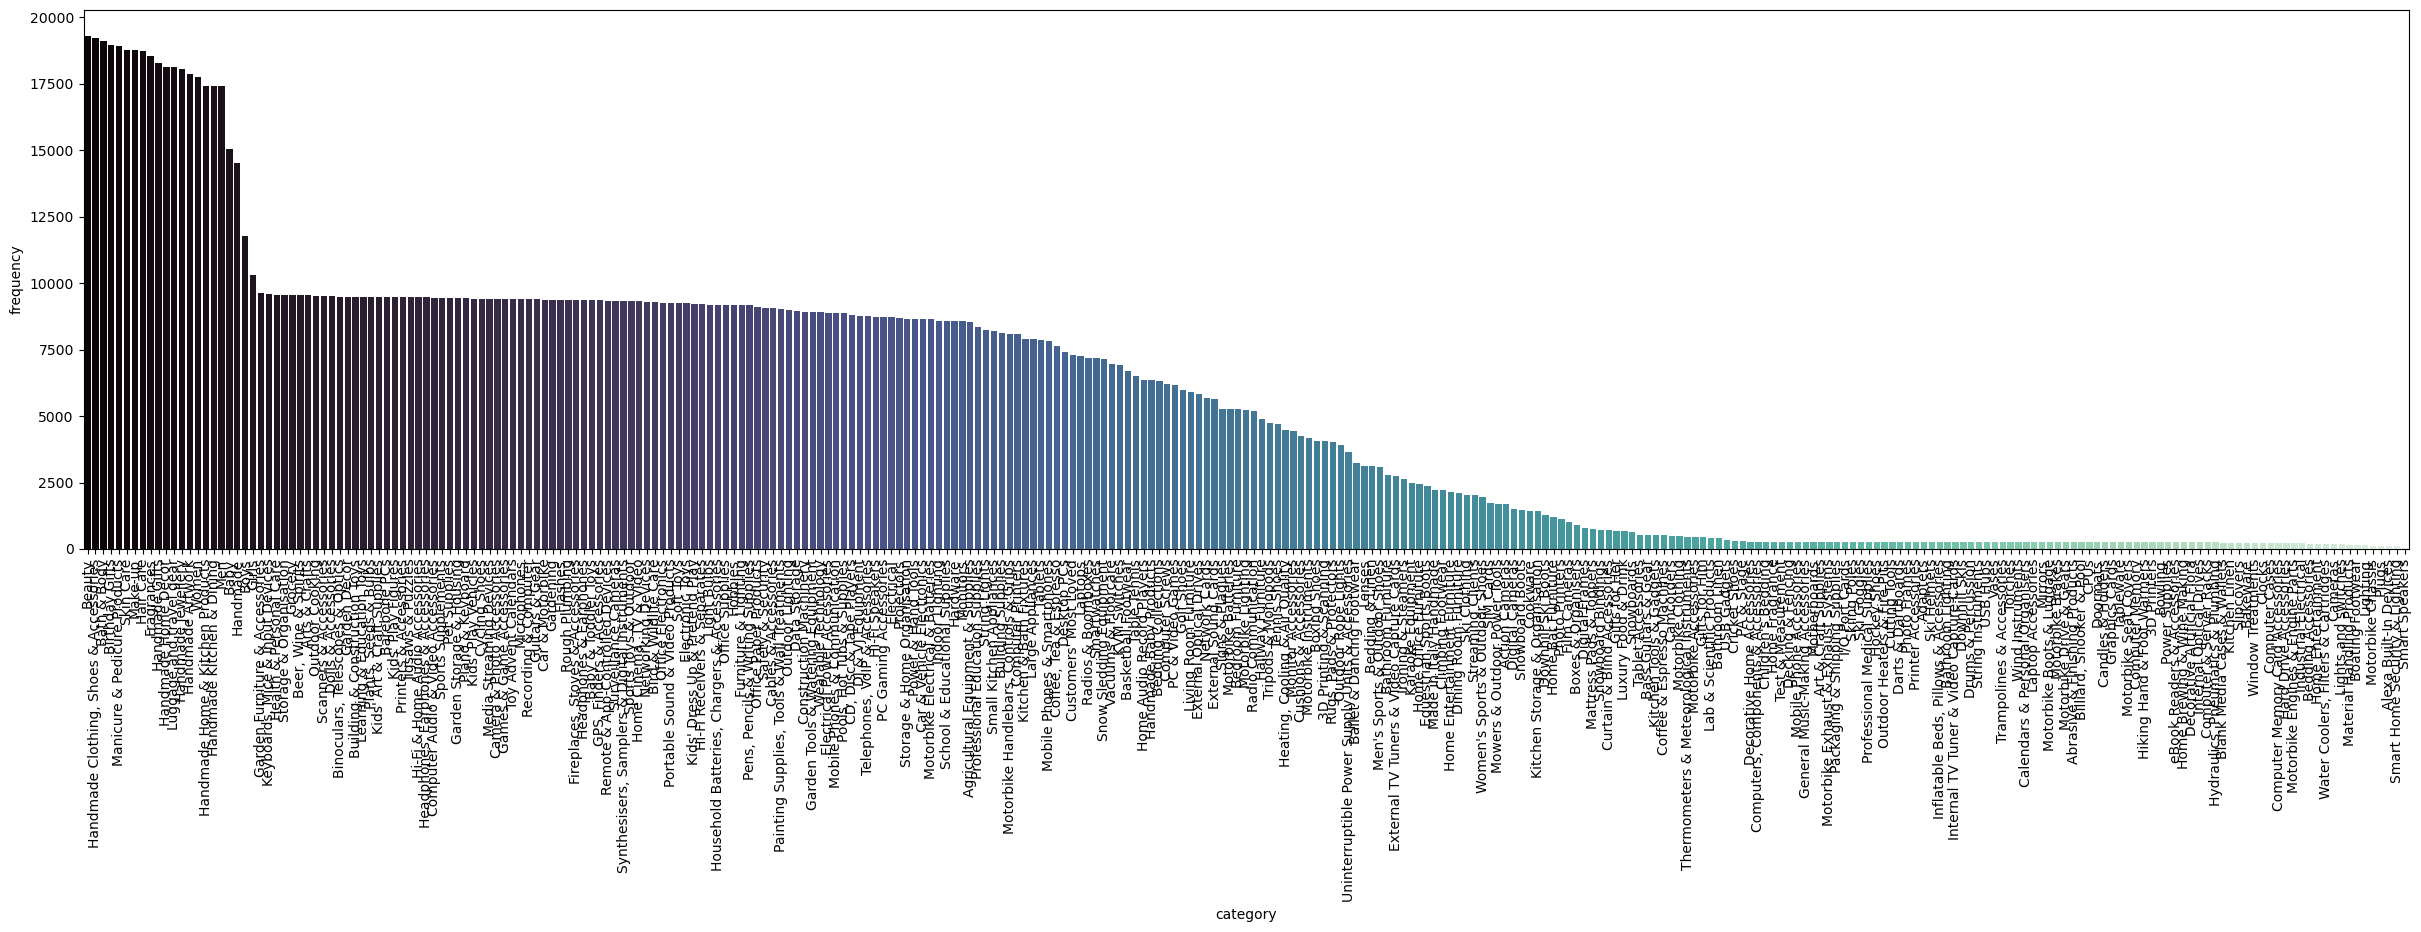

In [44]:
plt.figure(figsize=(30,7))
plt.xticks(rotation=90)
sns.barplot(amz_cats[1:], x=amz_cats.index[1:], y="frequency", palette="mako") # Except the first one.

In [48]:
amz_data.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [53]:
amz_data["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [54]:
amz_data["price"].mode()

0    9.99
Name: price, dtype: float64

In [55]:
amz_data["price"].median()

19.09

**An average that is almost ten times as high as the mode signifies a right-skewed distribution.**

In [75]:
variance = amz_data["price"].var()
st_deviation = amz_data["price"].std()
range = amz_data["price"].max() - amz_data["price"].min()
quantiles_price = amz_data["price"].quantile([0.25, 0.5, 0.75])


variance, st_deviation, range, quantiles_price

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

**With the standard deviation being roughly 345$ it appears that product prizes vary greatly**

<Axes: xlabel='category'>

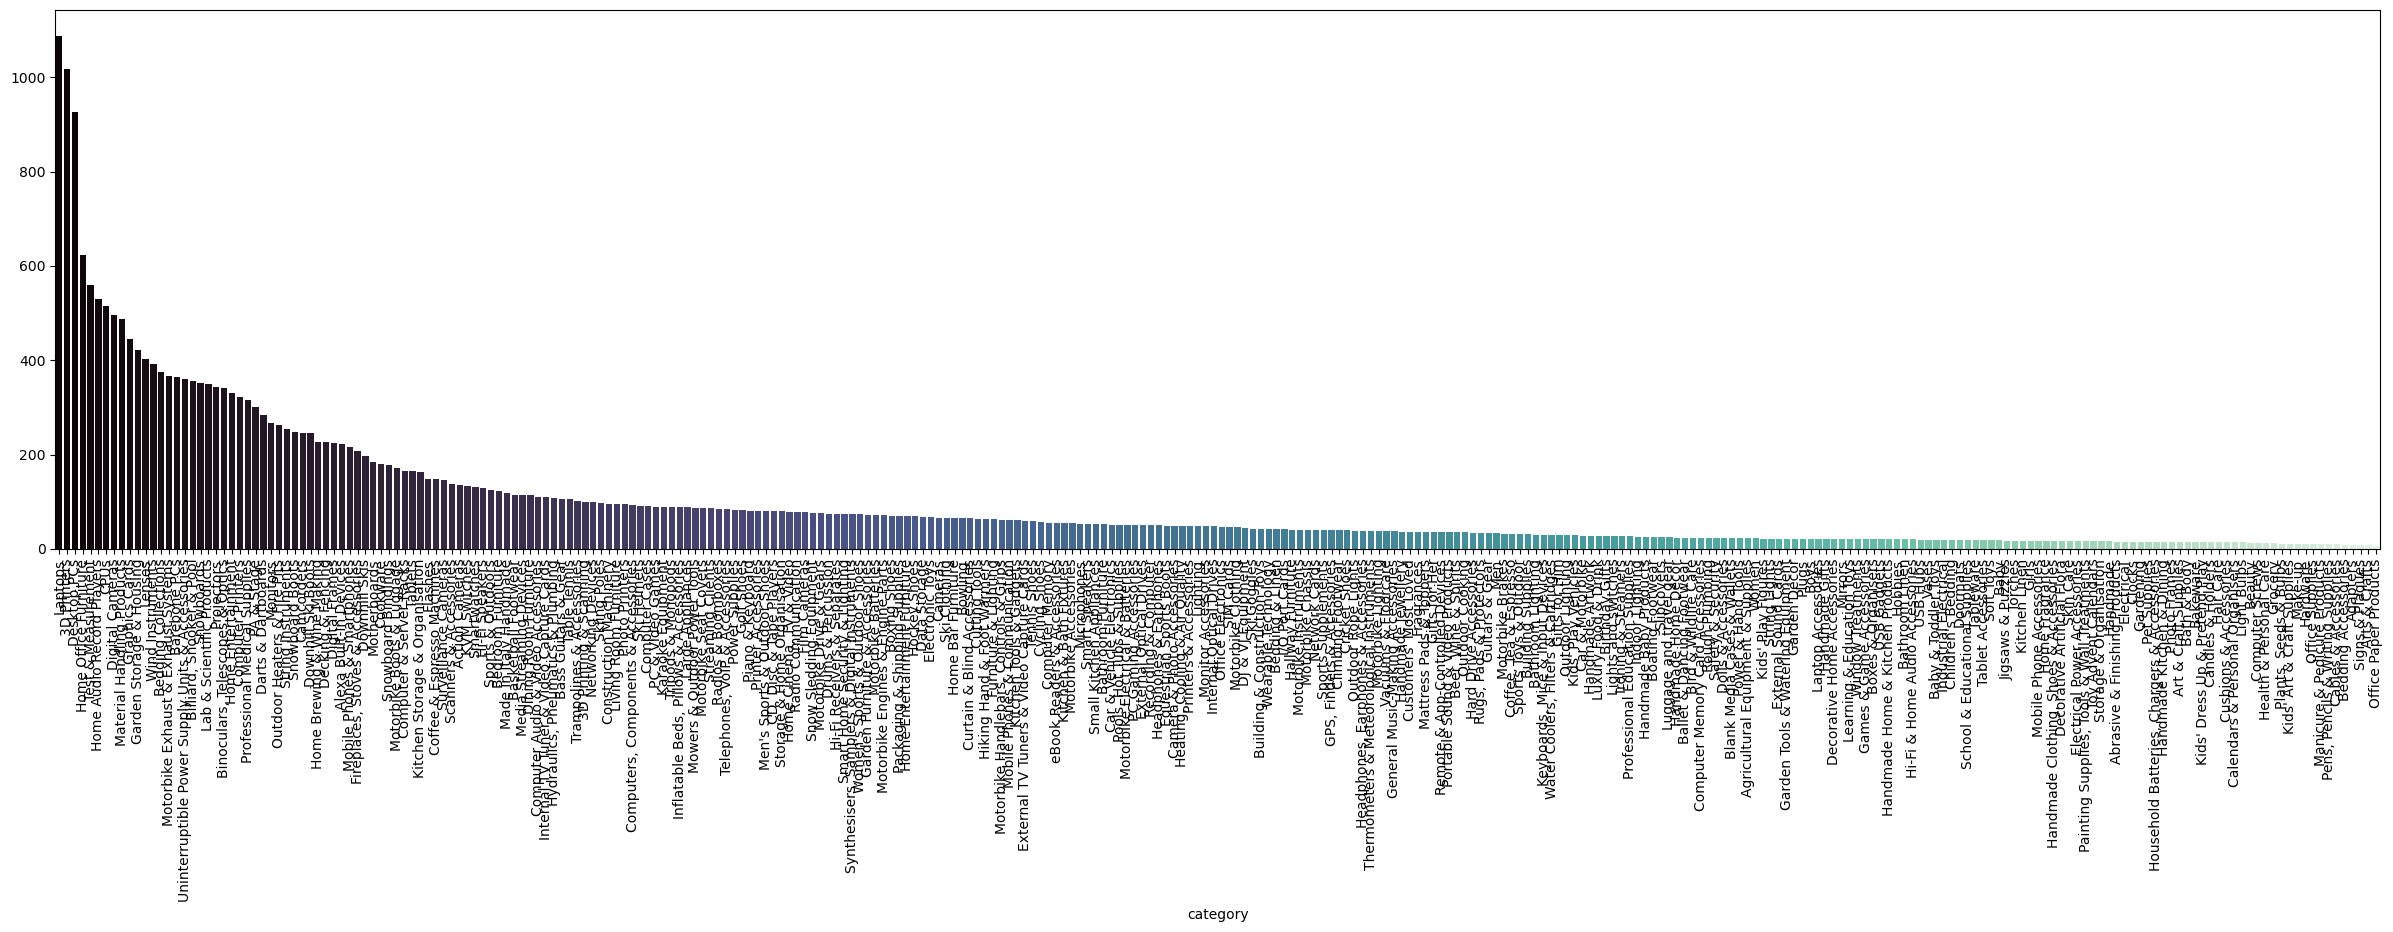

In [86]:
avg_prices = amz_data.groupby(["category"])["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(30,7))
plt.xticks(rotation=90)
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="mako")

In [98]:
avg_prices = pd.DataFrame(avg_prices)
combined_cats = avg_prices.join(amz_cats, on=avg_prices.index)

In [108]:
combined_cats = combined_cats.sort_values(by="frequency", ascending=False)

In [110]:
combined_cats.head()

,price,frequency
category,,
Sports & Outdoors,125.769814,836265
Beauty,13.222322,19312
"Handmade Clothing, Shoes & Accessories",16.865767,19229
Bath & Body,15.042266,19092
Birthday Gifts,26.585166,18978


<Axes: xlabel='price', ylabel='frequency'>

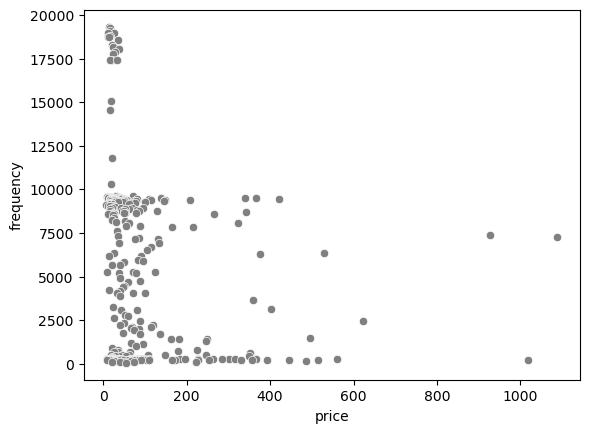

In [115]:
sns.scatterplot(data=combined_cats[1:], x="price", y="frequency", color="gray") # Except the first one

<Axes: xlabel='price', ylabel='Count'>

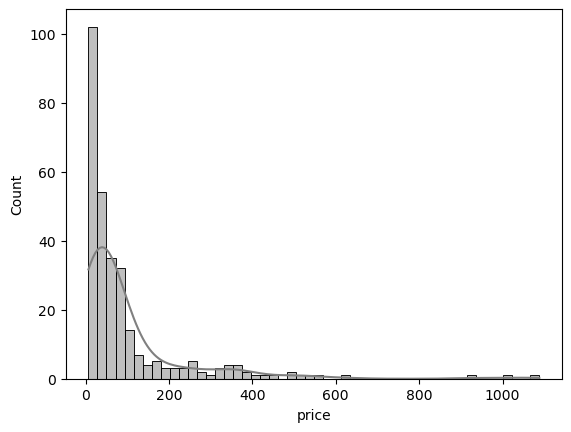

In [114]:
sns.histplot(combined_cats["price"][1:], kde=True, bins=50, color="gray")

<Axes: xlabel='price'>

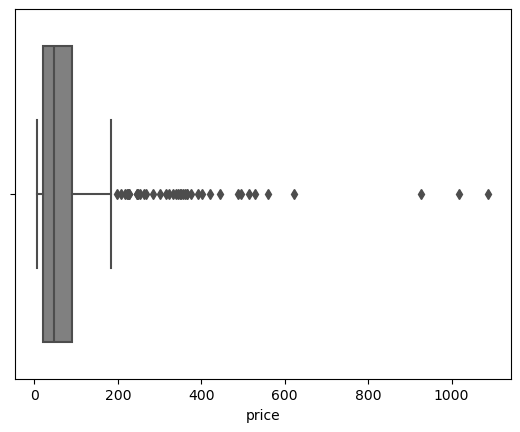

In [117]:
sns.boxplot(x=combined_cats["price"][1:], color="gray")

In [120]:
amz_data.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [123]:
mean_rating = amz_data["stars"].mean()
median_rating = amz_data["stars"].median()
mode_rating = amz_data["stars"].mode()

mean_rating, median_rating, mode_rating

(2.152836472966065,
 0.0,
 0    0.0
 Name: stars, dtype: float64)

<Axes: xlabel='stars', ylabel='Count'>

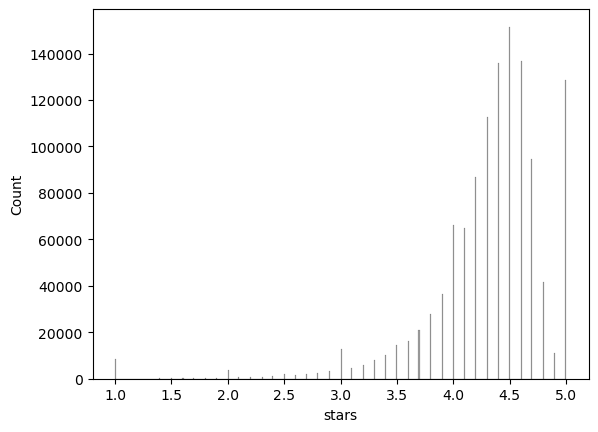

In [131]:
sns.histplot(amz_data[amz_data["stars"]!=0], x="stars", color="gray")

In [133]:
variance_rating = amz_data["stars"].var()
st_deviation_rating = amz_data["stars"].std()
quantiles_price_rating = amz_data["stars"].quantile([0.25, 0.5, 0.75])


variance_rating, st_deviation_rating, range_rating, quantiles_price_rating

(4.81743402976196,
 2.1948653785054697,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

**Considering the wide gap between 0 star ratings and 5 star ratings i would say the spread is wide**

In [134]:
skewness_rating = amz_data["stars"].skew()
kurtosis_rating = amz_data["stars"].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

**A very small skewness **